In [1]:
# importing libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt 

# loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [4]:
df_DA_US['salary_year_avg'].sample(10)

437177     47500.0
631787    105375.0
193497    115000.0
201918    112434.0
432821     90000.0
286372    100000.0
538006     70000.0
471485    204584.5
206773     52200.0
595828     95000.0
Name: salary_year_avg, dtype: float64

<Axes: >

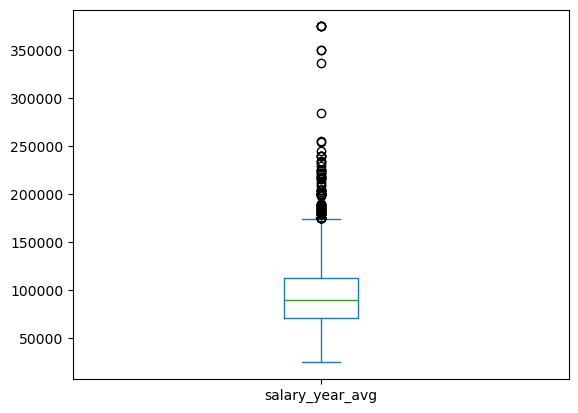

In [5]:
df_DA_US['salary_year_avg'].plot(kind='box')

<Axes: >

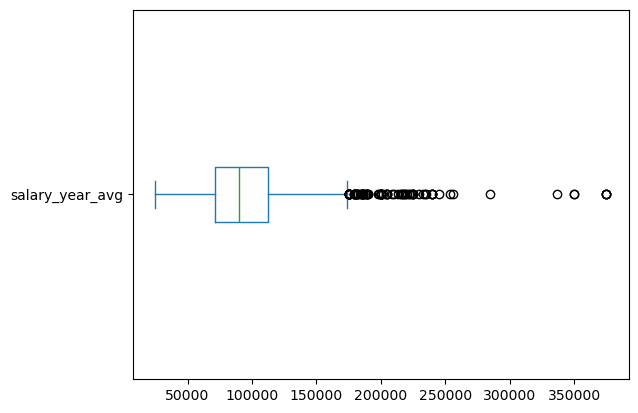

In [6]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

In [16]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter data to approprate job titles
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

In [17]:
df_US['job_title_short'].value_counts()

job_title_short
Data Analyst      67816
Data Scientist    58830
Data Engineer     35080
Name: count, dtype: int64

In [18]:
df_US = df_US.dropna(subset=['salary_year_avg'])
df_US['salary_year_avg']

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_12408\1485236335.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


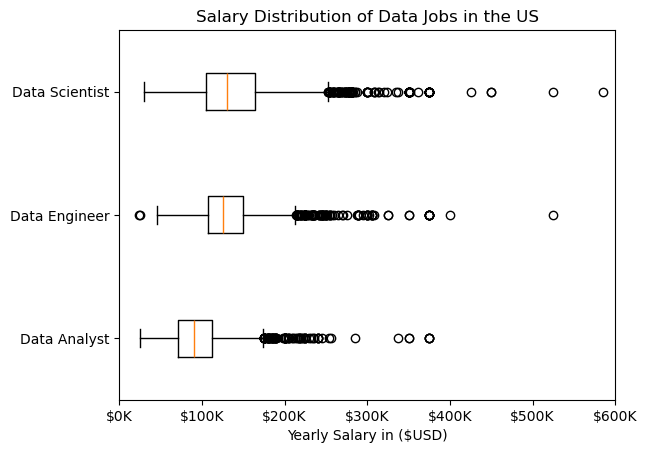

In [25]:
job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg']for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution of Data Jobs in the US')
plt.xlabel('Yearly Salary in ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000) 
plt.show()